In [163]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [65]:
# Mounting the drive and importing the dataset
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Loading the data from the path
path = 'drive/My Drive'
df = pd.read_csv(path+"/mined_news_content2.csv")
df.head()

,Unnamed: 0,article,category,url
0,0,"('multiple', None, None, ['\nPrime Minister Bo...",politics,https://www.bbc.com/news/uk-56572775
1,1,"('multiple', None, None, [""\nBrazil's Jair Bol...",politics,https://www.bbc.com/news/world-latin-america-5...
2,2,"('multiple', None, None, ['\nThe US military s...",politics,tps://www.bbc.com/news/world-asia-39595989
3,3,"('multiple', None, None, ['\nUS President Dona...",politics,https://www.bbc.com/news/technology-55569604
4,4,"('multiple', None, None, [""\nNorthern Ireland'...",politics,https://www.bbc.com/news/uk-northern-ireland-5...


In [67]:
# Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80 non-null     int64 
 1   article     80 non-null     object
 2   category    80 non-null     object
 3   url         80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


### **Cleaning the dataset**

In [68]:
# Removing irrelevant texts at the beginning of the article
article = df['article']
for i in range(len(article)):
  article[i] = article[i][29:]
df['article'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'Prime Minister Boris Johnson has joined more than 20 world leaders in calling for a new global settlement to help the world prepare for future pandemics. \\n\', \'\\nIn a newspaper article the leaders, including the German chancellor and French president, said Covid posed the biggest challenge since World War Two.\\n\', \'\\nWriting in the Daily Telegraph and publications such as Le Monde in France and El Pais in Spain, the 24 leaders argue that a treaty similar to that reached in the wake of World War Two is needed to build cross-border cooperation.\\n\', \'\\nThe signatories, who include the head of the World Health Organization, Dr Tedros Adhanom Ghebreyesus, said: "At that time, following the devastation of two world wars, political leaders came together to forge the multilateral system. \\n\', \'\\n"The aims were clear: To bring countries together, to dispel the temptations of isolationism and nationalism, and to address the challenges that could only be achieved together in the 

In [69]:
# Cleaning texts input from articles and removing special characters
import re
import string
from html.parser import HTMLParser
from nltk.corpus import stopwords

# Function turning a list into a string
def listToString(s): 
    str1 = " "   
    return (str1.join(s))

# Function to clean texts
def clean_texts(text):
  # Removing html characters
  text = HTMLParser().unescape(text)
  # Removing urls and hashtags
  text = re.sub(r'https?:\/\/.\S+', "", text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'^RT[\s]+', '', text)
  # Contradiction replacement
  dictionary={"'s":" is","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are", "\n":" "}
  for key,value in dictionary.items():
      if key in text:
          text = text.replace(key, value)
  # Convert to lower case
  text = text.lower()
  # Removing stopwords
  nltk.download('stopwords')
  stopwords_eng = stopwords.words('english') 
  text_tokens = text.split()
  text_list=[]
  for word in text_tokens:
      if word not in stopwords_eng:
          text_list.append(word)
  # Remove punctuations
  clean_text = []
  for word in text_list:
      if word not in string.punctuation:
          clean_text.append(word)

  # Turning the list of words into a single string
  clean_text = listToString(clean_text)
  return clean_text

In [70]:
# Cleaning all texts in the articles
for i in range(len(df['article'])):
  df['article'][i] = clean_texts(df['article'][i])
df['article'][0] 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

'prime minister boris johnson joined 20 world leaders calling new global settlement help world prepare future pandemics. \\n\', \'\\nin newspaper article leaders, including german chancellor french president, said covid posed biggest challenge since world war two.\\n\', \'\\nwriting daily telegraph publications le monde france el pais spain, 24 leaders argue treaty similar reached wake world war two needed build cross-border cooperation.\\n\', \'\\nthe signatories, include head world health organization, dr tedros adhanom ghebreyesus, said: "at time, following devastation two world wars, political leaders came together forge multilateral system. \\n\', \'\\n"the aims clear: bring countries together, dispel temptations isolationism nationalism, address challenges could achieved together spirit solidarity co-operation namely peace, prosperity, health security."\\n\', \'\\nfrance\\ president emmanuel macron, german chancellor angela merkel leaders said spirit, countries must "be better pr

### **Preparing data for modelling**

In [71]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

df = df.drop(['Unnamed: 0', 'url'], axis=1)

# Encoding the category column
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [167]:
# Getting the encoded values of category
le.inverse_transform([0, 1, 2, 3])

array(['business', 'entertainment', 'politics', 'sports'], dtype=object)

In [150]:
# Shuffling the data
df = df.reindex(np.random.permutation(df.index))

# Splitting features from the label
data = df['article'].values
target = df['category'].values

In [151]:
# Splitting the data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [152]:
# Preparing the tokenizer
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(data)

In [153]:
# Integer encoding the documents
encoded_data = tokenizer.texts_to_sequences(data)
print(encoded_data[0:2])

[[51, 23, 8, 42, 46, 30, 34, 16, 8, 43, 9, 44, 44, 51, 16, 96, 3, 1, 23, 9, 97, 15, 44, 17, 85, 44, 51, 51, 47, 76, 76, 16, 42, 6, 46, 32, 76, 51, 63, 23, 30, 38, 44, 44, 16, 46, 3, 1, 91, 23, 27, 97, 3, 1, 51, 34, 28, 92, 81, 3, 1, 98, 42, 3, 4], [76, 17, 12, 15, 11, 60, 54, 70, 37, 1, 63, 64, 63, 63, 1, 15, 76, 64, 15, 76, 55, 15, 70, 70, 12, 86, 33, 12, 63, 45, 1, 6, 64, 63, 1, 17, 12, 3, 48, 1, 71, 1, 71, 17, 12, 1, 63, 15, 9, 6, 36, 36, 9, 77, 37, 15, 30, 1, 37, 6, 48, 60, 11, 1, 48, 44, 48, 44, 64, 47, 4]]


In [154]:
# Saving the tokenizer object
import pickle

filename = "tokenizer.pickle"
pickle.dump(tokenizer, open(filename, 'wb'))

In [155]:
# pad documents to a max length of 6 words
max_length = 10
padded_data = pad_sequences(encoded_data, maxlen=max_length, padding='post')

In [156]:
# # Applying classifiaction algorithms to predict similar newspapers
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# import xgboost as xgb

# model = KNeighborsClassifier(n_neighbors = 4)
# y_pred = model.fit(padded_train, y_train).predict(padded_test)
# score = accuracy_score(y_pred, y_test)
# print("The score of our KNN model is: ", score*100, "%")

# model2 = xgb.XGBClassifier()
# y_pred = model2.fit(padded_train, y_train).predict(padded_test)
# score = accuracy_score(y_pred, y_test)
# print("The score of our xgboost model is: ", score*100, "%")

In [157]:
# # Saving the xgboost model for deployment
# import pickle

# filename = "newspaper_model.sav"
# pickle.dump(model2, open(filename, 'wb'))

In [158]:
# Using Principal component analysis (PCA) model for dimensionality reduction
from sklearn.decomposition import PCA

model = PCA(2)
X_reduced = model.fit_transform(padded_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


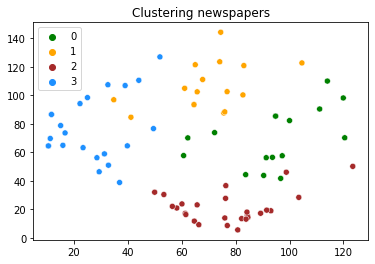

In [159]:
# Using clustering model and dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=4, random_state=0)
X_new = kmeans.fit_transform(X_reduced)
pickle_in = open("newspaper_model.sav", "rb")
model = pickle.load(pickle_in)
label = model.predict(X_reduced)

score = accuracy_score(label, target)
plt.title("Clustering newspapers")
sns.scatterplot(X_new[:, 0], X_new[:, 1], hue=label, palette=['green','orange','brown','dodgerblue'],legend='full')

**We can observe from the chart above that the model is performing well on clustering politics and sports articles but struggles to differentiate between business and arts. Mining more data will help in solving this issue**

In [160]:
score = accuracy_score(label, target)

In [161]:
# Evaluating the accuracy of the model
print("The accuracy score of the k-means clustering is: ", score*100,"%")

The accuracy score of the k-means clustering is:  33.75 %


In [162]:
# Saving the model
import pickle

filename = "newspaper_model.sav"
pickle.dump(kmeans, open(filename, 'wb'))

In [214]:
# Testing the prediction of the model

# Loading the model
pickle_in = open("newspaper_model.sav", "rb")
model = pickle.load(pickle_in)

content = df['article'][25]
content = clean_texts(content)
encoded_text = tokenizer.texts_to_sequences([content])
max_length = 2
padded_text = pad_sequences(encoded_text, maxlen=max_length, padding='post')
y_pred = model.predict(padded_text)
print(y_pred)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  from ipykernel import kernelapp as app


In [209]:
y_pred

array([1], dtype=int32)